### Data Understanding

#### Setting up Python libraries and Reading the source data

In [522]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [523]:
# Import the packages
import numpy as np
from numpy.random import uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [524]:
# Import country-educationcompanydata.csv file
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking the data details using shape, info , describe methods

In [525]:
df.shape

(9240, 37)

In [526]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Data Preparation

In [528]:
# Columns having values as 'select' represents null value. CHecking the avg percentage of such values in these columns having 'Select' values

print(round(100*(df.Specialization.isnull().sum())/len(df), 2))
print(round(100*(df['How did you hear about X Education'].isnull().sum())/len(df), 2))
print(round(100*(df['Lead Profile'].isnull().sum())/len(df), 2))
print(round(100*(df['City'].isnull().sum())/len(df), 2))

15.56
23.89
29.32
15.37


In [529]:
# Since data contains 'select' which represents null value, let's convert them to actual null value for better clarity
def is_select(x):
    if x=='Select':
        return np.NaN
    else:
        return x
df['Specialization']=df.Specialization.apply(is_select)
df['How did you hear about X Education']=df['How did you hear about X Education'].apply(is_select)
df['Lead Profile']=df['Lead Profile'].apply(is_select)
df['City']=df['City'].apply(is_select)

In [530]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [531]:
# CHecking the percentage of NULLs now as we converted Columns having values as 'select' to null value. It should increase now

print(round(100*(df.Specialization.isnull().sum())/len(df), 2))
print(round(100*(df['How did you hear about X Education'].isnull().sum())/len(df), 2))
print(round(100*(df['Lead Profile'].isnull().sum())/len(df), 2))
print(round(100*(df['City'].isnull().sum())/len(df), 2))

36.58
78.46
74.19
39.71


In [532]:
# Check for null values in each column
round(100*(df.isnull().sum())/len(df), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [533]:
# Drop columns with high missing values as these columns won't impact the decision much

df.drop('Prospect ID',axis=1,inplace=True)   # Prospect ID and Lead# contains unique data so we will drop Prospect ID and keep Lead#
df.drop('How did you hear about X Education',axis=1,inplace=True)
df.drop('Lead Quality',axis=1,inplace=True)
df.drop('Lead Profile',axis=1,inplace=True)
df.drop('Tags',axis=1,inplace=True)          # This column is created by sales team hence we can remove it
df.drop('City',axis=1,inplace=True)
df.drop('Specialization',axis=1,inplace=True)
df.drop('Country',axis=1,inplace=True)
#df.drop('What is your current occupation',axis=1,inplace=True)
#df.drop('Last Notable Activity',axis=1,inplace=True)
df.drop('Asymmetrique Activity Index',axis=1,inplace=True)
df.drop('Asymmetrique Profile Index',axis=1,inplace=True)
df.drop('Asymmetrique Activity Score',axis=1,inplace=True)
df.drop('Asymmetrique Profile Score',axis=1,inplace=True)

In [534]:
round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Check if columns are skewed using the value_counts of each column. Identified columns have been dropped in the next command

In [535]:
#print(df['Lead Origin'].value_counts(),'\n')
#print(df['Lead Source'].value_counts(normalize=True),'\n')
#print(df['Do Not Email'].value_counts(normalize=True))
#print(df['Do Not Call'].value_counts())
#print(df['Converted'].value_counts())
#print(df['TotalVisits'].value_counts())
#print(df['Total Time Spent on Website'].value_counts())
#print(df['Page Views Per Visit'].value_counts())
#print(df['Last Activity'].value_counts())
#print(df['What is your current occupation'].value_counts())
#print(df['What matters most to you in choosing a course'].value_counts())
#print(df['Search'].value_counts())
#print(df['Magazine'].value_counts())
#print(df['Newspaper Article'].value_counts())
#print(df['X Education Forums'].value_counts())
#print(df['Newspaper'].value_counts())
#print(df['Digital Advertisement'].value_counts())
#print(df['Through Recommendations'].value_counts())
#print(df['Receive More Updates About Our Courses'].value_counts())
#print(df['Update me on Supply Chain Content'].value_counts())
#print(df['Get updates on DM Content'].value_counts())
#print(df['I agree to pay the amount through cheque'].value_counts())
#print(df['A free copy of Mastering The Interview'].value_counts())
#print(df['Last Notable Activity'].value_counts())

In [536]:
# Columns which are skewed, need to be dropped from analysis.
df.drop('Do Not Email',axis=1,inplace=True)
df.drop('Do Not Call',axis=1,inplace=True)
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)
df.drop('Search',axis=1,inplace=True)
df.drop('Magazine',axis=1,inplace=True)
df.drop('Newspaper Article',axis=1,inplace=True)
df.drop('X Education Forums',axis=1,inplace=True)
df.drop('Newspaper',axis=1,inplace=True)
df.drop('Digital Advertisement',axis=1,inplace=True)
df.drop('Through Recommendations',axis=1,inplace=True)
df.drop('Receive More Updates About Our Courses',axis=1,inplace=True)
df.drop('Update me on Supply Chain Content',axis=1,inplace=True)
df.drop('Get updates on DM Content',axis=1,inplace=True)
df.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [537]:
df.shape

(9240, 11)

In [538]:
round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [539]:
#Rows haveing more than 5  fields as missing will not provide much information, hence removing them.

df = df[df.isnull().sum(axis=1) <= 5]
df.shape

(9240, 11)

In [540]:
#Lets impute the remaining null values with mode and mean.
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)

df['Last Activity'].fillna(df['Last Activity'].mode()[0],inplace=True)
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace=True)
#df['City'].fillna(df['City'].mode()[0],inplace=True)

In [541]:
df['TotalVisits'].fillna(df['TotalVisits'].mean(),inplace=True)

In [542]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(),inplace=True)

In [543]:
round(100*(df.isnull().sum())/len(df), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [544]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.818723,548.021466,2.145333
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Handling Categorical columns

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [546]:
#Converting some binary variables (Yes/No) to 0/1
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [547]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [548]:
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity']], drop_first=True)
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [549]:
df.shape

(9240, 71)

In [550]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0


In [551]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity'], 1)

In [552]:
df.shape

(9240, 66)

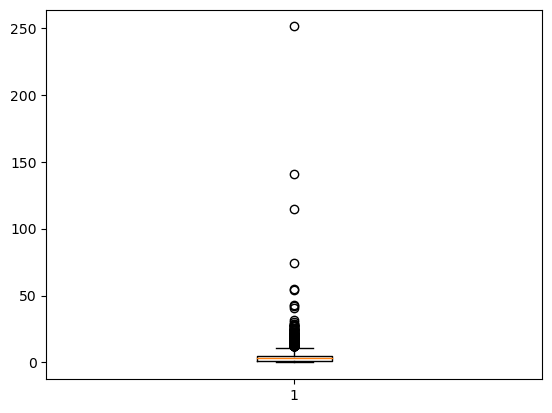

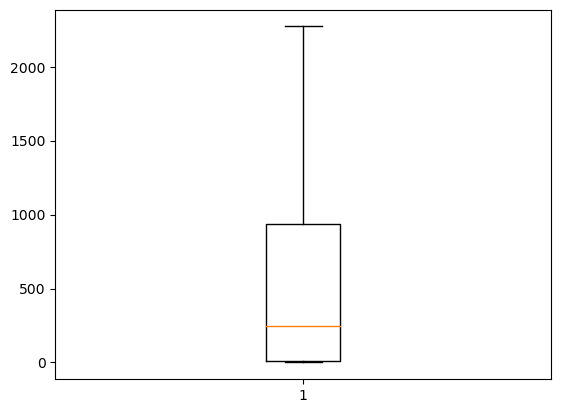

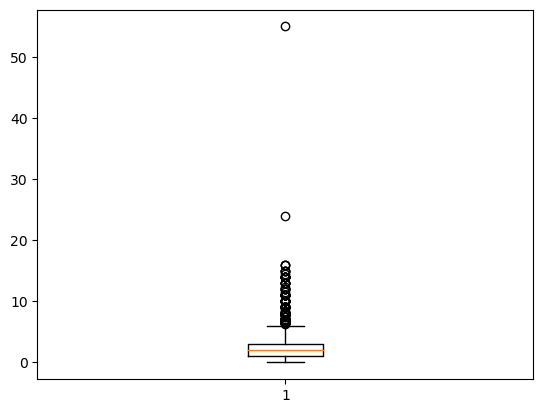

In [553]:
# Check for the outliers on each columns of data frame using box plot
plt.boxplot(df['TotalVisits'])
plt.show()
plt.boxplot(df['Total Time Spent on Website'])
plt.show()
plt.boxplot(df['Page Views Per Visit'])
plt.show()

In [554]:
# Will identify IQR

Q1 = df.TotalVisits.quantile(0.01)
Q3 = df.TotalVisits.quantile(0.99)
IQR = Q3 - Q1
df = df[(df.TotalVisits >= Q1 - 1.5*IQR) & (df.TotalVisits <= Q3 + 1.5*IQR)]

Q1 = df['Page Views Per Visit'].quantile(0.01)
Q3 = df['Page Views Per Visit'].quantile(0.99)
IQR = Q3 - Q1
df = df[(df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 9239
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9232 non-null   int64  
 1   Converted                                             9232 non-null   int64  
 2   TotalVisits                                           9232 non-null   float64
 3   Total Time Spent on Website                           9232 non-null   int64  
 4   Page Views Per Visit                                  9232 non-null   float64
 5   A free copy of Mastering The Interview                9232 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9232 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9232 non-null   uint8  
 8   Lead Origin_Lead Import                               9232

In [556]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,...,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000
mean,617187.303401,0.385507,3.366226,487.540186,2.352287,0.312500,0.528488,0.077773,0.005958,0.000108,...,0.000108,0.001516,0.368826,0.019822,0.034012,0.000108,0.235160,0.003466,0.005091,0.000108
std,23410.001881,0.486741,3.446434,547.981735,2.058668,0.463538,0.499215,0.267828,0.076959,0.010408,...,0.010408,0.038914,0.482513,0.139397,0.181270,0.010408,0.424122,0.058776,0.071173,0.010408
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596477.250000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615484.500000,0.000000,3.000000,248.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,42.000000,2272.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [557]:
df.shape

(9232, 66)

In [558]:
# percent change in data 
((9240-9232)/9240)*100

0.08658008658008658

#### Test train split

In [559]:
# Putting feature variable to X
X = df.drop(['Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [560]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [561]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [562]:
from sklearn.preprocessing import StandardScaler

In [563]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1032,0.770832,1.622397,1.773418,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6557,0.187978,1.298157,-0.172548,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4310,-0.103450,-0.572594,-0.415793,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3191,0.187978,0.349120,0.800435,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
712,-0.686304,-0.610847,-0.659039,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [564]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Model building

In [565]:
import statsmodels.api as sm

In [566]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.1
Date:                Sat, 28 Oct 2023   Deviance:                       5322.2
Time:                        14:29:24   Pearson chi2:                 7.26e+03
No. Iterations:                    26   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   26.9177   6.26e+05    4.3e-05      1.000   -1.23e+06    1.23e+06
TotalVisits                                              0.2527      0.046      5.485      0.000       0.162       0.343
Total Time Spent on Website                              1.1137      0.040     27.709      0.000       1.035       1.192
Page Views Per Visit                                    -0.2520      0.054     -4.708      0.000      -0.357      -0.147
A free copy of Mastering The Interview                   0.0758      0.106      0.712      0.476      -0.133       0.284
Lead Origin_Landing Page Submission                     -0.1290      0.107     -1.202      0.229      -0.339       0.081
Lead Origin_Lead Add Form                                2.6842      0.532      5.045      0.000       1.641       3.727
Lead Origin_Lead Import                                 30.4620   2.09e+06   1.46e-05      1.000   -4.09e+06    4.09e+06
Lead Origin_Quick Add Form                              20.5703   2.04e+04      0.001      0.999      -4e+04       4e+04
Lead Source_Direct Traffic                              -0.2274      1.360     -0.167      0.867      -2.894       2.439
Lead Source_Facebook                                   -30.2762   2.09e+06  -1.45e-05      1.000   -4.09e+06    4.09e+06
Lead Source_Google                                       0.2685      1.356      0.198      0.843      -2.388       2.926
Lead Source_Live Chat                                   22.1446      1e+05      0.000      1.000   -1.97e+05    1.97e+05
Lead Source_NC_EDM                                      33.2844   1.02e+07   3.25e-06      1.000   -2.01e+07    2.01e+07
Lead Source_Olark Chat                                   1.0649      1.362      0.782      0.434      -1.604       3.734
Lead Source_Organic Search                               0.0050      1.362      0.004      0.997      -2.664       2.674
Lead Source_Pay per Click Ads                          -22.9105   1.67e+05     -0.000      1.000   -3.26e+05    3.26e+05
Lead Source_Press_Release                              -24.9079   2.66e+05  -9.36e-05      1.000   -5.22e+05    5.22e+05
Lead Source_Reference                                    0.9252      1.265      0.731      0.465      -1.555       3.405
Lead Source_Referral Sites                               0.0972      1.391      0.070      0.944      -2.629       2.823
Lead Source_Social Media                                 2.5701      1.994      1.289      0.197      -1.338       6.478
Lead Source_WeLearn                                     29.4430   1.55e+06    1.9e-05      1.000   -3.03e+06    3.03e+06
Lead Source_Welingak Website                             2

### Step 8: Feature Selection Using RFE (Recursive Feature Elimination)

In [567]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [568]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [569]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False])

In [570]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', False, 38),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 13),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_WeLearn', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 44),
 ('Lead Source_blog', False, 19),
 ('Lead Source_goog

In [571]:
col = X_train.columns[rfe.support_]

In [572]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visit

##### Assessing the model with StatsModels

In [573]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.2
Date:                Sat, 28 Oct 2023   Deviance:                       5464.3
Time:                        14:29:27   Pearson chi2:                 7.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3885
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2802      0.566     -0.495      0.621      -1.390       0.830
Total Time Spent on Website                              1.1136      0.039     28.399      0.000       1.037       1.191
Lead Origin_Lead Add Form                                3.6184      0.190     19.008      0.000       3.245       3.992
Lead Source_Olark Chat                                   1.1881      0.101     11.789      0.000       0.991       1.386
Lead Source_Welingak Website                             2.0779      0.740      2.806      0.005       0.627       3.529
Last Activity_Converted to Lead                         -1.2914      0.217     -5.944      0.000      -1.717      -0.866
Last Activity_Email Bounced                             -2.2490      0.366     -6.142      0.000      -2.967      -1.531
Last Activity_Olark Chat Conversation                   -1.5170      0.160     -9.476      0.000      -1.831      -1.203
What is your current occupation_Housewife               21.7929   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
What is your current occupation_Student                 -0.6554      0.610     -1.075      0.283      -1.851       0.540
What is your current occupation_Unemployed              -1.0915      0.567     -1.924      0.054      -2.203       0.020
What is your current occupation_Working Professional     1.5635      0.591      2.644      0.008       0.404       2.723
Last Notable Activity_Email Bounced                      1.4662      0.573      2.558      0.011       0.343       2.590
Last Notable Activity_Had a Phone Conversation           2.7241      1.149      2.371      0.018       0.472       4.976
Last Notable Activity_SMS Sent                           1.4314      0.078     18.292      0.000       1.278       1.585
Last Notable Activity_Unreachable                        1.5771      0.475      3.317      0.001       0.645       2.509
========================================================================================================================
"""

In [574]:
# THis column won't impact much on the Lead Score, hence dropping it
col = col.drop('What is your current occupation_Housewife',1)

In [575]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2734.3
Date:                Sat, 28 Oct 2023   Deviance:                       5468.6
Time:                        14:29:27   Pearson chi2:                 7.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1477      0.527      0.280      0.779      -0.886       1.181
Total Time Spent on Website                              1.1122      0.039     28.382      0.000       1.035       1.189
Lead Origin_Lead Add Form                                3.6219      0.190     19.043      0.000       3.249       3.995
Lead Source_Olark Chat                                   1.1867      0.101     11.779      0.000       0.989       1.384
Lead Source_Welingak Website                             2.0726      0.740      2.799      0.005       0.621       3.524
Last Activity_Converted to Lead                         -1.2912      0.217     -5.944      0.000      -1.717      -0.865
Last Activity_Email Bounced                             -2.2494      0.366     -6.143      0.000      -2.967      -1.532
Last Activity_Olark Chat Conversation                   -1.5209      0.160     -9.495      0.000      -1.835      -1.207
What is your current occupation_Student                 -1.0829      0.574     -1.887      0.059      -2.208       0.042
What is your current occupation_Unemployed              -1.5187      0.529     -2.873      0.004      -2.555      -0.483
What is your current occupation_Working Professional     1.1359      0.554      2.050      0.040       0.050       2.222
Last Notable Activity_Email Bounced                      1.4665      0.573      2.559      0.011       0.343       2.590
Last Notable Activity_Had a Phone Conversation           2.7236      1.149      2.371      0.018       0.472       4.975
Last Notable Activity_SMS Sent                           1.4308      0.078     18.289      0.000       1.277       1.584
Last Notable Activity_Unreachable                        1.5740      0.476      3.308      0.001       0.641       2.507
========================================================================================================================
"""

In [576]:
col = col.drop('What is your current occupation_Student',1)

In [577]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.2
Date:                Sat, 28 Oct 2023   Deviance:                       5472.3
Time:                        14:29:27   Pearson chi2:                 7.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3878
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7548      0.206     -3.665      0.000      -1.158      -0.351
Total Time Spent on Website                              1.1138      0.039     28.434      0.000       1.037       1.191
Lead Origin_Lead Add Form                                3.6258      0.190     19.073      0.000       3.253       3.998
Lead Source_Olark Chat                                   1.1798      0.101     11.721      0.000       0.983       1.377
Lead Source_Welingak Website                             2.0682      0.740      2.793      0.005       0.617       3.519
Last Activity_Converted to Lead                         -1.2987      0.217     -5.982      0.000      -1.724      -0.873
Last Activity_Email Bounced                             -2.2597      0.366     -6.175      0.000      -2.977      -1.542
Last Activity_Olark Chat Conversation                   -1.5177      0.160     -9.483      0.000      -1.831      -1.204
What is your current occupation_Unemployed              -0.6143      0.206     -2.977      0.003      -1.019      -0.210
What is your current occupation_Working Professional     2.0400      0.266      7.678      0.000       1.519       2.561
Last Notable Activity_Email Bounced                      1.4757      0.573      2.575      0.010       0.353       2.599
Last Notable Activity_Had a Phone Conversation           2.7215      1.149      2.369      0.018       0.470       4.973
Last Notable Activity_SMS Sent                           1.4280      0.078     18.246      0.000       1.275       1.581
Last Notable Activity_Unreachable                        1.5795      0.475      3.327      0.001       0.649       2.510
========================================================================================================================
"""

In [578]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1032    0.865977
6557    0.818277
4310    0.645862
3191    0.272841
712     0.033957
3942    0.636757
6808    0.235769
9206    0.604366
4698    0.094626
6563    0.235769
dtype: float64

In [579]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86597729, 0.8182772 , 0.64586218, 0.27284101, 0.03395653,
       0.63675688, 0.23576946, 0.60436597, 0.09462607, 0.23576946])

In [580]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,CustID
0,1,0.865977,1032
1,1,0.818277,6557
2,0,0.645862,4310
3,0,0.272841,3191
4,0,0.033957,712


In [581]:
from sklearn import metrics

In [582]:
y_train_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Convert       6462 non-null   int64  
 1   Convert_Prob  6462 non-null   float64
 2   CustID        6462 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 151.6 KB


#### Checking VIF

In [583]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [584]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,1.94
2,Lead Source_Olark Chat,1.73
1,Lead Origin_Lead Add Form,1.48
11,Last Notable Activity_SMS Sent,1.45
6,Last Activity_Olark Chat Conversation,1.42
5,Last Activity_Email Bounced,1.30
3,Lead Source_Welingak Website,1.27
0,Total Time Spent on Website,1.25
9,Last Notable Activity_Email Bounced,1.24
8,What is your current occupation_Working Profes...,1.22


VIF values looks fine as all are below 5

In [585]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.2
Date:                Sat, 28 Oct 2023   Deviance:                       5472.3
Time:                        14:29:27   Pearson chi2:                 7.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3878
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7548      0.206     -3.665      0.000      -1.158      -0.351
Total Time Spent on Website                              1.1138      0.039     28.434      0.000       1.037       1.191
Lead Origin_Lead Add Form                                3.6258      0.190     19.073      0.000       3.253       3.998
Lead Source_Olark Chat                                   1.1798      0.101     11.721      0.000       0.983       1.377
Lead Source_Welingak Website                             2.0682      0.740      2.793      0.005       0.617       3.519
Last Activity_Converted to Lead                         -1.2987      0.217     -5.982      0.000      -1.724      -0.873
Last Activity_Email Bounced                             -2.2597      0.366     -6.175      0.000      -2.977      -1.542
Last Activity_Olark Chat Conversation                   -1.5177      0.160     -9.483      0.000      -1.831      -1.204
What is your current occupation_Unemployed              -0.6143      0.206     -2.977      0.003      -1.019      -0.210
What is your current occupation_Working Professional     2.0400      0.266      7.678      0.000       1.519       2.561
Last Notable Activity_Email Bounced                      1.4757      0.573      2.575      0.010       0.353       2.599
Last Notable Activity_Had a Phone Conversation           2.7215      1.149      2.369      0.018       0.470       4.973
Last Notable Activity_SMS Sent                           1.4280      0.078     18.246      0.000       1.275       1.581
Last Notable Activity_Unreachable                        1.5795      0.475      3.327      0.001       0.649       2.510
========================================================================================================================
"""

In [586]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [587]:
y_train_pred[:10]

array([0.86597729, 0.8182772 , 0.64586218, 0.27284101, 0.03395653,
       0.63675688, 0.23576946, 0.60436597, 0.09462607, 0.23576946])

In [588]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [589]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted
0,1,0.865977,1032,1
1,1,0.818277,6557,1
2,0,0.645862,4310,1
3,0,0.272841,3191,0
4,0,0.033957,712,0


In [590]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8113587124729186


In [591]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,1.94
2,Lead Source_Olark Chat,1.73
1,Lead Origin_Lead Add Form,1.48
11,Last Notable Activity_SMS Sent,1.45
6,Last Activity_Olark Chat Conversation,1.42
5,Last Activity_Email Bounced,1.30
3,Lead Source_Welingak Website,1.27
0,Total Time Spent on Website,1.25
9,Last Notable Activity_Email Bounced,1.24
8,What is your current occupation_Working Profes...,1.22


In [592]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3470,  472],
       [ 747, 1773]], dtype=int64)

In [593]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [594]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7035714285714286

In [595]:
# Let us calculate specificity
TN / float(TN+FP)

0.8802638254693049

In [596]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11973617453069507


In [597]:
# positive predictive value 
print (TP / float(TP+FP))

0.7897550111358574


In [598]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8228598529760494


### Step 9: Plotting the ROC Curve (Receiver Operating Characteristic)

An ROC curve demonstrates several things:

- Sensitivity and Specifity is inversely proportional to each other (any increase in sensitivity will be accompanied by a decrease in specificity).
- The test is considered more accurate if the curve follows the left-hand border and then the top border of the ROC space
- The test is considered less accurate, if the curve comes to the 45-degree diagonal of the ROC space

In [599]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [600]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

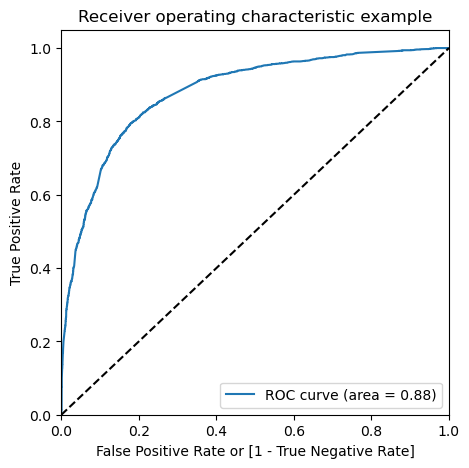

In [601]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Step 10: Finding Optimal Cutoff Point

In [602]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.865977,1032,1,1,1,1,1,1,1,1,1,1,0
1,1,0.818277,6557,1,1,1,1,1,1,1,1,1,1,0
2,0,0.645862,4310,1,1,1,1,1,1,1,1,0,0,0
3,0,0.272841,3191,0,1,1,1,0,0,0,0,0,0,0
4,0,0.033957,712,0,1,0,0,0,0,0,0,0,0,0


In [603]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389972  1.000000  0.000000
0.1   0.1  0.584339  0.971825  0.336631
0.2   0.2  0.739554  0.916270  0.626585
0.3   0.3  0.794646  0.841270  0.764840
0.4   0.4  0.811359  0.774603  0.834855
0.5   0.5  0.811359  0.703571  0.880264
0.6   0.6  0.791860  0.591667  0.919838
0.7   0.7  0.775611  0.510714  0.944952
0.8   0.8  0.743423  0.389286  0.969812
0.9   0.9  0.708759  0.272222  0.987823


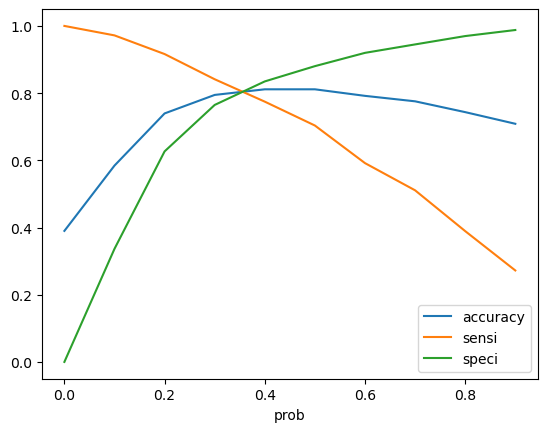

In [604]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [605]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.865977,1032,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.818277,6557,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.645862,4310,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.272841,3191,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.033957,712,0,1,0,0,0,0,0,0,0,0,0,0


In [606]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8040854224698236

In [607]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3154,  788],
       [ 478, 2042]], dtype=int64)

In [608]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [609]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8103174603174603

In [610]:
# Let us calculate specificity
TN / float(TN+FP)

0.8001014713343481

In [611]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19989852866565194


In [612]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7215547703180212


In [613]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8683920704845814


### Step 11: Making predictions on the test set

In [614]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [615]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4869,1.520389,0,0,0,0,0,0,0,1,0,0,0,0
8687,1.746263,0,0,0,0,0,0,1,0,0,0,1,0
6309,-0.885904,1,0,1,0,0,0,1,0,0,0,1,0
8158,-0.885904,0,1,0,0,0,0,1,0,0,0,0,0
2509,0.899234,0,0,0,0,0,0,0,0,0,0,1,0


In [616]:
X_test_sm = sm.add_constant(X_test)

In [617]:
y_test_pred = res.predict(X_test_sm)

In [618]:
y_test_pred[:10]

4869    0.951597
8687    0.881196
6309    0.991559
8158    0.235769
2509    0.842205
7812    0.292163
435     0.143601
7843    0.355927
5442    0.358572
2307    0.896032
dtype: float64

In [619]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [620]:
# Let's see the head
y_pred_1.head()

,0
4869,0.951597
8687,0.881196
6309,0.991559
8158,0.235769
2509,0.842205


In [621]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [622]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [623]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [624]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [625]:
y_pred_final.head()

,Converted,CustID,0
0,1,4869,0.951597
1,1,8687,0.881196
2,1,6309,0.991559
3,1,8158,0.235769
4,1,2509,0.842205


In [626]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

,Converted,CustID,Churn_Prob
0,1,4869,0.951597
1,1,8687,0.881196
2,1,6309,0.991559
3,1,8158,0.235769
4,1,2509,0.842205


In [627]:
# Rearranging the columns
##y_pred_final = y_pred_final.reindex_axis(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], axis=1)

In [628]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,CustID,Churn_Prob
0,1,4869,0.951597
1,1,8687,0.881196
2,1,6309,0.991559
3,1,8158,0.235769
4,1,2509,0.842205


In [629]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [630]:
y_pred_final.head()

,Converted,CustID,Churn_Prob,final_predicted
0,1,4869,0.951597,1
1,1,8687,0.881196,1
2,1,6309,0.991559,1
3,1,8158,0.235769,0
4,1,2509,0.842205,1


In [631]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8010830324909747

In [632]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1380,  351],
       [ 200,  839]], dtype=int64)

In [633]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [634]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8075072184793071

In [635]:
# Let us calculate specificity
TN / float(TN+FP)

0.7972270363951474

In [636]:
# Calculate the Score


In [637]:
y_pred_final['Score'] = y_pred_final['Churn_Prob']*100

In [638]:
y_pred_final.head()

,Converted,CustID,Churn_Prob,final_predicted,Score
0,1,4869,0.951597,1,95.159749
1,1,8687,0.881196,1,88.119646
2,1,6309,0.991559,1,99.155938
3,1,8158,0.235769,0,23.576946
4,1,2509,0.842205,1,84.220497
